Clean version of the analysis and results for the dissrtation

In [1]:
from __future__ import absolute_import, division, print_function
import datetime

import pandas as pd
import scipy.stats  as stats
from scipy import special
import numpy as np

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import imgkit

from collections import OrderedDict

import sys
sys.path.insert(0, '../../../src/data/')

from config import *
from analysis_connections import generate_analysis_connections_store_key

2019-04-18 18:12:12,863 - DEBUG - backend module://ipykernel.pylab.backend_inline version unknown


# Load

In [2]:
company_dyads_annual_full_clean = pd.read_hdf(analysis_notebooks_store_path, 'team_performance/company_dyads_annual_full_clean')
company_dyads_daily_full_clean  = pd.read_hdf(analysis_notebooks_store_path, 'team_performance/company_dyads_daily_full_clean')

In [3]:
company_dyads_annual_full_clean['m123_rank_r'] = company_dyads_annual_full_clean.m123_rank.max() - company_dyads_annual_full_clean.m123_rank + 1

In [74]:
# checking for missing data
df = company_dyads_daily_full_clean
print(len(df[df.isnull().any(axis=1)]))
df[df.isnull().any(axis=1)][['Q1_mean','Q2_mean','Q1_var','Q2_var']]

49


,Q1_mean,Q2_mean,Q1_var,Q2_var
1,4.0,4.0,NaN,NaN
10,6.0,6.0,NaN,NaN
26,6.0,5.0,NaN,NaN
50,4.0,5.0,NaN,NaN
63,5.0,7.0,NaN,NaN
82,7.0,7.0,NaN,NaN
101,6.0,6.0,NaN,NaN
120,6.0,6.0,NaN,NaN
132,7.0,5.0,NaN,NaN
134,6.0,6.0,NaN,NaN


In [75]:
# Load members and companies. Filter out problematic companies
members_panel = pd.read_hdf(analysis_notebooks_store_path, 'panels/members_panel')
company_panel = pd.read_hdf(analysis_notebooks_store_path, 'panels/company_panel')
members_panel = members_panel.query('company not in ("Company Q","Company J")')
company_panel = company_panel.query('company not in ("Company Q","Company J")')

In [6]:
daily_survey_data_clean = pd.read_hdf(surveys_clean_store_path, 'daily/daily_survey_data_clean')
daily_survey_data_clean = daily_survey_data_clean.join(members_panel['company'], on='member')
daily_survey_data_clean = daily_survey_data_clean.query('company != "Company Q"')
daily_survey_data_clean = daily_survey_data_clean.query('company != "Company J"')

# Common functions

# Tables

## Descriptive statistics

In [7]:
data = []

In [8]:
# participants
members_active = len(members_panel.query('company not in ("EIR","Staff")'))
data.append(['Participants',members_active, '-', '-', '-', '-'])

members_active = len(members_panel.query('company in ("EIR","Staff")'))
data.append(['Mentors and staff',members_active, '-', '-', '-', '-'])

In [9]:
def list_to_str(l):
    new_l = []
    for x in l:
        new_l.append("{:.2f}".format(float(x)))
    return new_l

In [10]:
# Companies
#data.append(['Companies',len(company_panel), '-', '-', '-', '-'])

data.append(['Company size',len(company_panel)]+list_to_str([
    company_panel.members_count.mean(),
    company_panel.members_count.var(),
    company_panel.members_count.min(),
    company_panel.members_count.max()
]))

In [11]:
# responses
data.append(['q1 responses',daily_survey_data_clean.Q1.count()]+list_to_str([
    daily_survey_data_clean.Q1.mean(),
    daily_survey_data_clean.Q1.var(),
    daily_survey_data_clean.Q1.min(),
    daily_survey_data_clean.Q1.max()
]))

data.append(['q1 daily mean',company_dyads_daily_full_clean.Q1_mean.count()]+list_to_str([
    company_dyads_daily_full_clean.Q1_mean.mean(),
    company_dyads_daily_full_clean.Q1_mean.var(),
    company_dyads_daily_full_clean.Q1_mean.min(),
    company_dyads_daily_full_clean.Q1_mean.max()
]))

data.append(['q1 overall mean',company_dyads_annual_full_clean.Q1_mean.count()]+list_to_str([
    company_dyads_annual_full_clean.Q1_mean.mean(),
    company_dyads_annual_full_clean.Q1_mean.var(),
    company_dyads_annual_full_clean.Q1_mean.min(),
    company_dyads_annual_full_clean.Q1_mean.max()
]))

data.append(['q2 responses mean',daily_survey_data_clean.Q2.count()]+list_to_str([
    daily_survey_data_clean.Q2.mean(),
    daily_survey_data_clean.Q2.var(),
    daily_survey_data_clean.Q2.min(),
    daily_survey_data_clean.Q2.max()
]))

data.append(['q2 daily mean',company_dyads_daily_full_clean.Q2_mean.count()]+list_to_str([
    company_dyads_daily_full_clean.Q2_mean.mean(),
    company_dyads_daily_full_clean.Q2_mean.var(),
    company_dyads_daily_full_clean.Q2_mean.min(),
    company_dyads_daily_full_clean.Q2_mean.max()
]))

data.append(['q2 overall mean',company_dyads_annual_full_clean.Q2_mean.count()]+list_to_str([
    company_dyads_annual_full_clean.Q2_mean.mean(),
    company_dyads_annual_full_clean.Q2_mean.var(),
    company_dyads_annual_full_clean.Q2_mean.min(),
    company_dyads_annual_full_clean.Q2_mean.max()
]))

In [12]:
# ranking
data.append(['Milestone Ranking','20','-','-','1','20'])

In [13]:
vcolumns = ['N' ,'Mean' ,'Var' ,'Min' , 'Max' ]
general_stats = pd.DataFrame(data,columns=['measure']+vcolumns)
general_stats

,measure,N,Mean,Var,Min,Max
0,Participants,67,-,-,-,-
1,Mentors and staff,16,-,-,-,-
2,Company size,17,3.94,2.81,2.00,8.00
3,q1 responses,1397,5.72,1.32,1.00,7.00
4,q1 daily mean,416,5.69,0.61,2.50,7.00
5,q1 overall mean,17,5.72,0.13,4.97,6.27
6,q2 responses mean,1393,5.85,1.20,1.00,7.00
7,q2 daily mean,416,5.80,0.63,1.50,7.00
8,q2 overall mean,17,5.83,0.12,4.99,6.30
9,Milestone Ranking,20,-,-,1,20


In [14]:
with open("/home/orenled/temp/general_stat.txt", "w") as text_file:
    text_file.write(general_stats.to_latex(index=False))
print(general_stats.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
           measure &     N &  Mean &   Var &   Min &   Max \\
\midrule
      Participants &    67 &     - &     - &     - &     - \\
 Mentors and staff &    16 &     - &     - &     - &     - \\
      Company size &    17 &  3.94 &  2.81 &  2.00 &  8.00 \\
      q1 responses &  1397 &  5.72 &  1.32 &  1.00 &  7.00 \\
     q1 daily mean &   416 &  5.69 &  0.61 &  2.50 &  7.00 \\
   q1 overall mean &    17 &  5.72 &  0.13 &  4.97 &  6.27 \\
 q2 responses mean &  1393 &  5.85 &  1.20 &  1.00 &  7.00 \\
     q2 daily mean &   416 &  5.80 &  0.63 &  1.50 &  7.00 \\
   q2 overall mean &    17 &  5.83 &  0.12 &  4.99 &  6.30 \\
 Milestone Ranking &    20 &     - &     - &     1 &    20 \\
\bottomrule
\end{tabular}



# Figures - general

In [15]:
sns_palette = "Set3"
#sns.color_palette(sns_palette)[2]

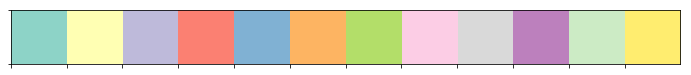

In [16]:
sns.palplot(sns.color_palette(sns_palette))

## Survey data

In [17]:
sns.set(font_scale=1.4) 
sns.set_style("ticks")

In [18]:
period1_end_ts = pd.Timestamp(period1_end, tz=time_zone)
def calc_period(ts):
    if ts <= period1_end_ts: return 0
    else:
        return 1
    
daily_survey_data_clean['ind_period'] = daily_survey_data_clean['effective_ts'].apply(calc_period)

In [20]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def plot_period(data, question_column, period, ax, ax2):
    data = data.query("ind_period == "+str(period)).copy()
    data['d'] = data['effective_ts'].rank(method='dense').astype(int) - 1
    
    data_agg = data.groupby('d')[[question_column]].count().reset_index()
        
    labels = data[['effective_ts','d']].drop_duplicates().sort_values(by='d')
    labels = labels.effective_ts.dt.strftime('%A (%m-%d)').tolist()

    sns.lineplot(x="d", y=question_column, markers=True, color=sns.color_palette(sns_palette)[4], marker="o",
             data=data,ax=ax, legend=False, label='score')
    
    # Add response rate
    
    sns.lineplot(x="d", y=question_column, markers=True, color=sns.color_palette(sns_palette)[2], marker="o", 
             lw=2, 
             data=data_agg,ax=ax2, legend=False, label='resp. rate')    
    
    ax2.lines[0].set_linestyle("--")
    
    ax.set_title('Q1, Period '+str(period+1))

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    ax.set_ylabel('')
    ax2.set_ylabel('')
    if period == 0:
        ax2.get_yaxis().set_ticklabels([])
    if period == 1:
        ax2.set_ylabel('response rate')
        
    return ax,ax2
    
    
def plot_timeline_by_period(data, question):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
    ax1_2 = ax1.twinx()
    ax2_2 = ax2.twinx()
    ax1_2.get_shared_y_axes().join(ax1_2, ax2_2)
    
    (ax1_1, ax1_2) = plot_period(data, "Q{}".format(question), 0, ax1,ax1_2)
    (ax2_1, ax2_2) = plot_period(data, "Q{}".format(question), 1, ax2,ax2_2)
    
    ax1.set_ylabel('score')
    ax1.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_xlabel('')

    ax1.set_title('Question {}, Period 1'.format(question))
    ax2.set_title('Question {}, Period 2'.format(question))
    
    f.legend(handles=[ax1.lines[0], ax1_2.lines[0]], loc=7)
    #f.tight_layout()
    f.subplots_adjust(right=0.75)  
    plt.show()

    return f

2019-04-18 18:12:15,831 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.4 to DejaVu Sans (u'/home/orenled/Envs/rhythm-private-analysis-deltav17/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000
2019-04-18 18:12:16,041 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.8 to DejaVu Sans (u'/home/orenled/Envs/rhythm-private-analysis-deltav17/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000


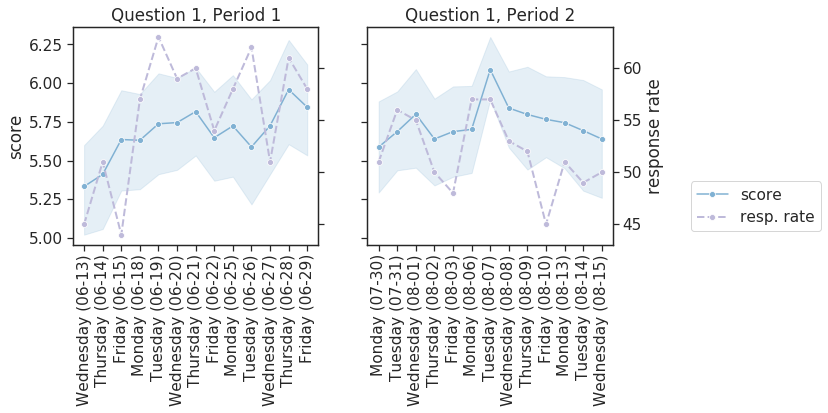

In [21]:
f = plot_timeline_by_period(daily_survey_data_clean,1)
f.savefig('/home/orenled/temp/q1_timeline.png', bbox_inches='tight')

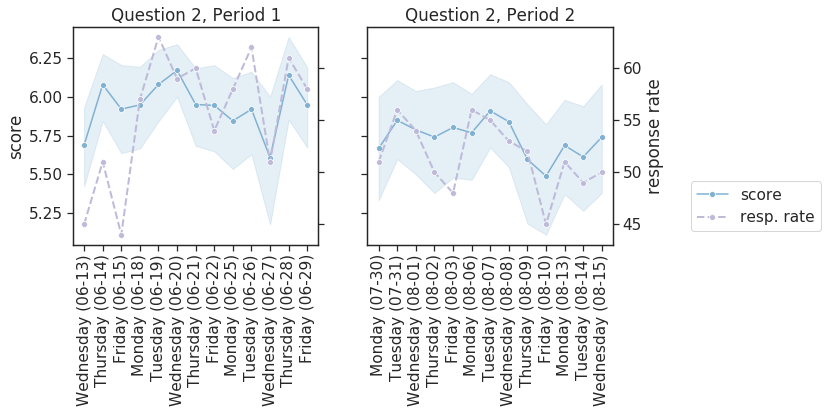

In [22]:
f = plot_timeline_by_period(daily_survey_data_clean,2)
f.savefig('/home/orenled/temp/q2_timeline.png', bbox_inches='tight')

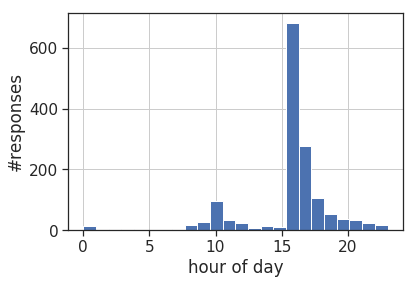

In [23]:
daily_survey_data_anon = pd.read_hdf(surveys_anon_store_path, 'daily/daily_survey_data_anon')
daily_survey_data_anon['RecordedDate_ts'] = pd.to_datetime(daily_survey_data_anon['RecordedDate']).dt.tz_localize(time_zone)
daily_survey_data_anon['h'] = daily_survey_data_anon['RecordedDate_ts'].dt.hour

ax = daily_survey_data_anon.h.hist(bins=24)
ax.set_ylabel('#responses')
ax.set_xlabel('hour of day')

fig = ax.get_figure()
fig.savefig('/home/orenled/temp/q12_hour_dist.png', bbox_inches='tight')

# Figures - population comparison (communication, performance, team size)

In [24]:
sns.set(font_scale=1.4) 
sns.set_style("ticks")

In [25]:
levels_min_mid_high=['low','mid','high']
levels_min_medium_high=['low','medium','high']

levels_size=['2-3','4','6-8']
levels_size_words=['small','medium','large']

## Shared functions

In [26]:
def performance_fig(data, lables,performance_col,indvar_col, wiskers = True, hue=None, palette=None, color=None, showFliers=True):
    """
    Creates a boxplot that compares several populations
    """
    if not wiskers:
        whis=False
        showfliers=0.0
    else:
        whis=None
        showfliers=True
    
    if not showFliers:
        showfliers=0.0
    
    ax = sns.boxplot(x=indvar_col, y=performance_col,
        data=data, showmeans=True, showfliers=showfliers, palette=palette, whis=whis, hue=hue, color=color)
    
    ax.set_xticklabels(lables)
    return ax


In [27]:
# Mann–Whitney U test for milestone data (objective performance)
def compare_groups_milestons(data, performance_col, column, g1,g2,test="mw"):
    print(data[column].value_counts())
    group_a = data.loc[data[column].isin(g1)]
    group_b = data.loc[data[column].isin(g2)] 


    if test == "mw":
        test_function = stats.mannwhitneyu
    elif test == "ttest":
        test_function = stats.ttest_ind
    elif test == "ks":
        test_function = stats.ks_2samp
    elif test =="wmw":
        test_function = stats.wilcoxon
    else:
        return

    print("Test: "+str(test_function))
    print("Group sizes: ",",",len(group_a),",",len(group_b))

    stat, p = test_function(group_a[performance_col], group_b[performance_col]) # low p-value = different        
    ma = group_a[performance_col].mean()
    mb = group_b[performance_col].mean()
    sema = group_a[performance_col].sem()
    semb = group_b[performance_col].sem()
    #print("p: {:.2f}, Means: {:.2f} ({:.2f}),{:.2f}({:.2f})".format(p,ma,sema,mb,semb))
    
    ks_stat1, ks_p1 = stats.kstest(group_a[performance_col], 'norm')
    ks_stat2, ks_p2 = stats.kstest(group_b[performance_col], 'norm')
    #print("KS test - group a: {:.2f}   group b: {:.2f}".format(ks_p1,ks_p2)) #p <= alpha: reject H0, not normal.
    result={
            'p-value':p,
            'group_a':g1,
            'group_b':g2,
            'group_a_mean':ma,
            'group_a_ser':sema,
            'group_b_mean':mb,
            'group_b_ser':semb,
            'group_a_ks':ks_p1,
            'group_b_ks':ks_p2,
            'test':str(test_function)
            
        }

    return [result]

# Creates the figures and calcualtes the MW test for the given groups
def analyze_milestone(data,performance_col,indvar_col,lables,g1,g2,wiskers=True, showFliers=True):
    # create figure
    ax = performance_fig(data=data,performance_col=performance_col,indvar_col=indvar_col,lables=lables,wiskers=wiskers,showFliers=showFliers,color=sns.color_palette("Set3")[2])
    
    # compare populations
    results = compare_groups_milestons(data=data,performance_col=performance_col, column=indvar_col, g1=g1,g2=g2)
    return ax, results

    return 

In [28]:
# Mann–Whitney U test for survey data (subjective performance)
def compare_groups(data,question_col, column, g1,g2,test="mw"):
    """
    column - percentile/tertile/quartile column to use
    g1 - percentile values for the first group
    g2 - same for second group
    """
    print(data[column].value_counts())
    group_a = data.loc[data[column].isin(g1)]
    group_b = data.loc[data[column].isin(g2)] 

    if test == "mw":
        test_function = stats.mannwhitneyu
    elif test == "ttest":
        test_function = stats.ttest_ind
    elif test == "ks":
        test_function = stats.ks_2samp
    elif test =="wmw":
        test_function = stats.wilcoxon
    else:
        return

    print("Test: "+str(test_function))
    print("Group sizes: ",",",len(group_a),",",len(group_b))

    columns=[]
    results=[]
    for q in range (1,3):
        question_column = 'Q'+str(q)+'_'+question_col
        columns.append(question_column)
        stat, p = test_function(group_a[question_column], group_b[question_column]) # low p-value = different        
        ma = group_a[question_column].mean()
        sema = group_a[question_column].sem()
        mia= group_a[question_column].median()
        mb = group_b[question_column].mean()
        semb = group_b[question_column].sem()
        mib= group_b[question_column].median()
            
        ks_stat1, ks_p1 = stats.kstest(group_a[question_column], 'norm')
        ks_stat2, ks_p2 = stats.kstest(group_b[question_column], 'norm')
            
        #print("Q{}, p: {:.2f}, Means: {:.2f} ({:.2f}),{:.2f} ({:.2f}), medians: {:.2f},{:.2f}".format(q, p,ma,sema,mb,semb,mia,mib))
        #print("--- KS test - Q{}: group a: {:.2f}   group b: {:.2f}".format(q,ks_p1,ks_p2)) #p <= alpha: reject H0, not normal.
        result={
            'question':q,
            'p-value':p,
            'group_a':g1,
            'group_b':g2,
            'group_a_mean':ma,
            'group_a_ser':sema,
            'group_b_mean':mb,
            'group_b_ser':semb,
            'group_a_ks':ks_p1,
            'group_b_ks':ks_p2,
            'test':str(test_function)
            
        }
        results.append(result)
    return results

# Creates the figures and calcualtes the MW test for the given groups
def analyze_two_questions(data,question_col,indvar_col,lables,g1,g2,wiskers=True):
    #g1 - percentile values for the first group
    #g2 - same for second group
    q1_column = 'Q1_'+question_col
    q2_column = 'Q2_'+question_col
    
    #prep data
    data_two_q = data\
    [[q1_column,q2_column,indvar_col]]\
    .rename(columns={q1_column:'Q1',q2_column:'Q2'})\
    .set_index(indvar_col).stack().reset_index()\
    .rename(columns={'level_1':'Question',0:question_col})
    
    # create figure
    ax = performance_fig(data=data_two_q,performance_col=question_col,indvar_col=indvar_col,lables=lables,wiskers=wiskers, hue="Question", palette="Set3")
    
    # compare populations
    results = compare_groups(data=data,question_col=question_col, column=indvar_col, g1=g1,g2=g2)
    return ax, results



In [31]:
# Helper function for generating table description
def group_to_desc(g,ind_var_desc,levels):
    desc = ""
    if len(g) == 1:
        desc = desc + levels[g[0]]
    else:
        # two terciles. We need to split the text so it fits
        #desc = desc + "\\makecell[l]{"
        #len0 = len(levels[g[0]])
        #len1 = len(levels[g[1]])
        #if len0 > len1:
        #    desc = desc + levels[g[0]] + ' \\\\ and '+ levels[g[1]]
        #else:
        #    desc = desc + levels[g[0]] + ' and \\\\'+ levels[g[1]]
        #desc = desc + "}"
        #desc = desc + levels[g[0]] + ' and '+ levels[g[1]]
        desc = desc + levels[g[0]] + ' and '+ levels[g[1]]
    return desc

# Takes a group and converst it to a column description


def star_pvalue(p):
    if p<0.01: return "***"
    if p<0.05: return "**"
    if p<0.1: return "*"
    return ""

# takes results and put them in an array, as a preparation for transformatino to latex
def results_to_array(results, performance_measure_name, ind_var_desc, levels=levels_min_medium_high):
    group_a = results[0]['group_a']
    group_b = results[0]['group_b']
    group_a_desc = group_to_desc(group_a, ind_var_desc,levels)
    group_b_desc = group_to_desc(group_b, ind_var_desc,levels)

    data = []
    for r in results:
        if 'question' in r:
            pref = performance_measure_name.format(r['question'])
        else:
            pref = performance_measure_name
            
        # remove underlines
        pref = pref.replace("\\_"," ")
            
        pvalue = "{:.2f}{}".format(r['p-value'],star_pvalue(r['p-value']))
        group_a_data = "{:.2f} ({:.2f})".format(r['group_a_mean'],r['group_a_ser'])
        group_b_data = "{:.2f} ({:.2f})".format(r['group_b_mean'],r['group_b_ser'])
        group_a_ks = "{:.2f}{}".format(r['group_a_ks'],star_pvalue(r['group_a_ks']))
        group_b_ks = "{:.2f}{}".format(r['group_b_ks'],star_pvalue(r['group_b_ks']))
        delta = "{:.2f}".format(abs(r['group_a_mean'] - r['group_b_mean']))
        d=[pref, pvalue, group_a_desc, group_b_desc, group_a_data, group_b_data, delta, group_a_ks, group_b_ks]
        data.append(d)
        
    return data

def result_to_latex_tables(data):
    columns = ['Performance measure','p-value\tnote{1}' ,
               'Group A\tnote{2}' ,'Group B\tnote{2}', 
               'Group A mean\tnote{3}', 'Group B mean\tnote{3}',
               '$\Delta$',
                'Group A KS\tnote{1,4}', 'Group B KS\tnote{1,4}',
              ]
    
    # create dataframe
    df = pd.DataFrame(data, columns = columns)
    
    # add row numbers
    df.reset_index(inplace=True)
    df['index'] = df['index']+1
    df = df.rename(columns={'index':''})
    
    #TODO - add row number
    return  "\\begin{table}[h]\n"+\
            "  \\caption{Daily/Overall subjective/Objective performance and ???-team communication}\n"+\
            "  \\label{tab:deltav_????}\n"+\
            "  \\begin{center}\n"+\
            "  \\small\n"+\
            "  \\begin{threeparttable}\n"+\
            df.to_latex(index=False, escape=False, column_format="SBMMMMMMMM").replace("begin{tabular}","begin{tabularx}{\\textwidth}").replace("end{tabular}","end{tabularx}")+\
            "  \\footnotesize\n"+\
            "  \\begin{tablenotes}\n"+\
            "  \\item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ \n"+\
            "  \\item[2] Tercile(s) used in Mann-Whitney U test \n"+\
            "  \\item[3] Standard errors in parentheses \n"+\
            "  \\item[4] One-sample Kolmogorov-Smirnov test p-value\n"+\
            "  \\end{tablenotes}\n"+\
            "  \\end{threeparttable}\n"+\
            "  \\end{center}\n"+\
            "\\end{table}\n\n\n"

In [32]:
def save_results(results,fname):
    print(results)
    with open("/home/orenled/temp/"+fname, "w") as text_file:
        text_file.write(results)

## Within-team

In [33]:
xlabel='Within-team communication'
section_results=[]

2    136
1    130
0    101
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 101 , 136


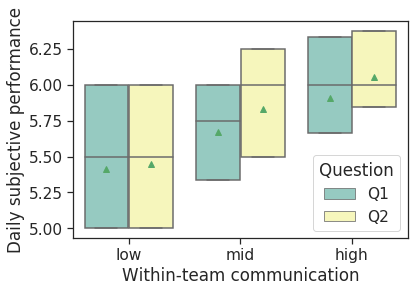

In [34]:
### Daily, subjective, minutes, mean
ax,results = analyze_two_questions(
    data=company_dyads_daily_full_clean.dropna(), question_col="mean",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high,wiskers=False)

ax.set(xlabel=xlabel, ylabel='Daily subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_daily_mean_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_daily\_mean','level of communication')

2    136
1    130
0    101
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 101 , 136


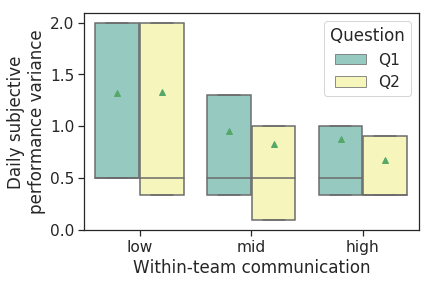

In [35]:
### Daily, subjective, minutes, var
ax,results = analyze_two_questions(
    data=company_dyads_daily_full_clean.dropna(), question_col="var",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high,wiskers=False)
    
ax.set(xlabel=xlabel, ylabel='Daily subjective\nperformance variance')
ax.legend(loc='upper right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_daily_var_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_daily\_var','level of communication')

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 11


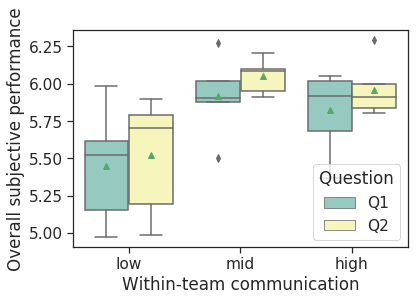

In [36]:
## Overall, subjective, minutes, mean
ax,results = analyze_two_questions(
    data=company_dyads_annual_full_clean, question_col="mean",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[1,2],
    lables=levels_min_mid_high)
    
ax.set(xlabel=xlabel, ylabel='Overall subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_overall_mean_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_overall\_mean','level of communication')

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 11 , 6


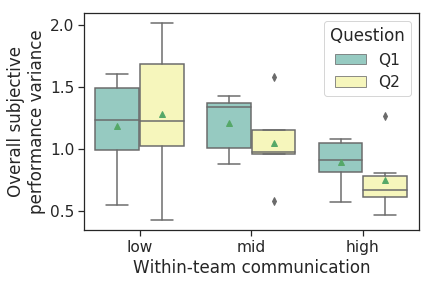

In [37]:
## Overall, subjective, minutes, var
ax,results = analyze_two_questions(
    data=company_dyads_annual_full_clean, question_col="var",indvar_col='minutes_62_norm_members_p',
    g1=[0,1],g2=[2],
    lables=levels_min_mid_high)
    
ax.set(xlabel=xlabel, ylabel='Overall subjective\nperformance variance')
ax.legend(loc='upper right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_overall_var_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_overall\_var','level of communication')

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 11 , 6


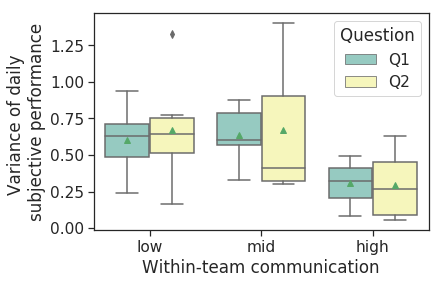

In [38]:
## Overall, subjective, minutes, var - daily
ax,results = analyze_two_questions(
    data=company_dyads_annual_full_clean, question_col="mean_daily_var",indvar_col='minutes_62_norm_members_p',
    g1=[0,1],g2=[2],
    lables=levels_min_mid_high)
    
ax.set(xlabel=xlabel, ylabel='Variance of daily \nsubjective performance')
ax.legend(loc='upper right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_var_of_q_daily_mean_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'var\_of\_q{}\_daily\_mean','level of communication')

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 6


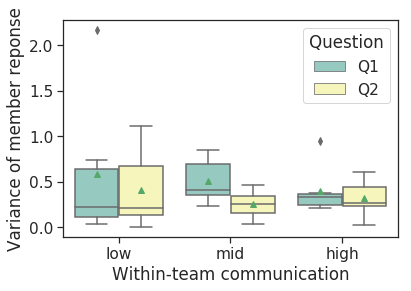

In [39]:
## Overall, subjective, minutes, var - daily
ax,results = analyze_two_questions(
    data=company_dyads_annual_full_clean, question_col="mean_member_var",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high)
    
ax.set(xlabel=xlabel, ylabel='Variance of member reponse')
ax.legend(loc='upper right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_var_of_q_member_mean_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'var\_of\_q{}\_member\_mean','level of communication')

In [40]:
save_results(result_to_latex_tables(section_results),"within_comm.txt")

\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
    &    Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
  1 &          q1 daily mean &          0.00*** &              low &             high &           5.42 (0.09) &           5.91 (0.05) &     0.49 &               0.00*** &               0.00*** \\
  2 &          q2 daily mean &          0.00*** &              low &             high &           5.45 (0.09) &           6.06 (0.05) &     0.61 &               0.00*** &               0.00*** \\
  3 &           q1 daily var &             0.13 &              low &             high &           1.32 (0.17) &           0.88 (0.09) &     0.44 &               0.00*** &   

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 11
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &   milestones reward &           0.05** &              low &  medium and high &     15250.00 (497.83) &     16371.36 (486.90) &  1121.36 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] One-sa

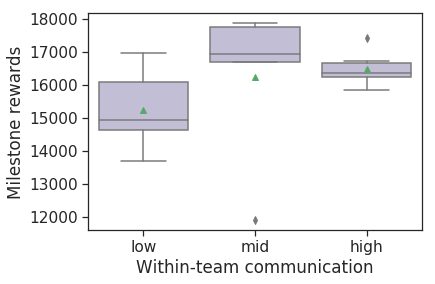

In [41]:
section_results=[]

## Overall, objective, minutes
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_total",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[1,2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone rewards')
#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_total_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestones\_reward','level of communication')

save_results(result_to_latex_tables(section_results),"within_comm_ojbective_reward.txt")

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 11
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &      milestone rank &           0.05** &              low &  medium and high &           6.83 (1.99) &          11.55 (1.55) &     4.71 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] One-sa

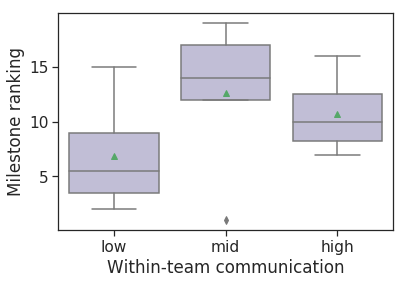

In [42]:
section_results=[]

## Overall, objective, minutes
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_rank_r",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[1,2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone ranking')
#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rank_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rank','level of communication')

save_results(result_to_latex_tables(section_results),"within_comm_ojbective.txt")

2    6
0    6
1    5
Name: minutes_62_m2c_entropy_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 11
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &      milestone rank &            0.06* &              low &  medium and high &          12.67 (0.88) &           8.36 (1.85) &     4.30 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] One-sam

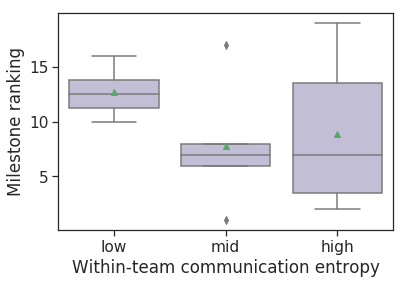

In [43]:
## Overall, objective, minutes
xlabel='Within-team communication entropy'
section_results=[]

ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_rank_r",indvar_col='minutes_62_m2c_entropy_p',
    g1=[0],g2=[1,2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone ranking')
#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rank_entropy.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rank','level of entropy')
save_results(result_to_latex_tables(section_results),"within_comm_ojbective_ent.txt")

### Objective, using $$$

2    6
0    6
1    5
Name: minutes_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 11
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &   milestone rewards &           0.05** &              low &  medium and high &     15250.00 (497.83) &     16371.36 (486.90) &  1121.36 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] One-sa

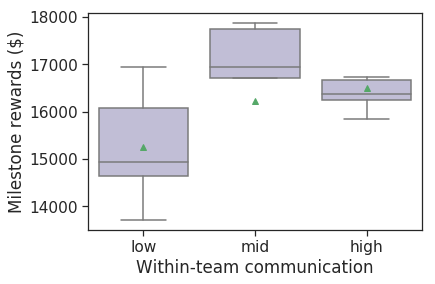

In [44]:
section_results=[]
xlabel='Within-team communication'

## Overall, objective, minutes
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_total",indvar_col='minutes_62_norm_members_p',
    g1=[0],g2=[1,2],
    lables=levels_min_mid_high,showFliers=False)

ax.set(xlabel=xlabel, ylabel='Milestone rewards (\$)')
#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rewards_minutes.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rewards','level of communication')

save_results(result_to_latex_tables(section_results),"within_comm_ojbective_rewards.txt")

2    6
0    6
1    5
Name: minutes_62_m2c_entropy_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 11
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &   milestone rewards &            0.06* &              low &  medium and high &     16780.00 (143.85) &     15536.82 (537.45) &  1243.18 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] One-sam

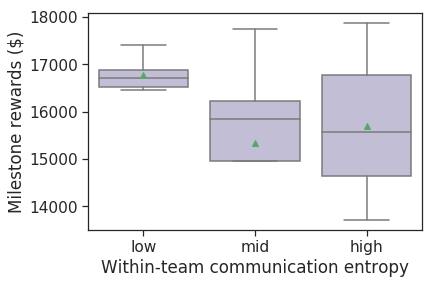

In [45]:
## Overall, objective, minutes
xlabel='Within-team communication entropy'
section_results=[]

ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_total",indvar_col='minutes_62_m2c_entropy_p',
    g1=[0],g2=[1,2],
    lables=levels_min_mid_high, showFliers=False)

ax.set(xlabel=xlabel, ylabel='Milestone rewards (\$)')
#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rewards_entropy.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rewards','level of entropy')
save_results(result_to_latex_tables(section_results),"within_comm_ojbective_ent_rewards.txt")

## Between-team

In [46]:
xlabel='Between-teams communication'
section_results=[]

1    127
2    125
0    115
Name: minutes_out_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 115 , 125


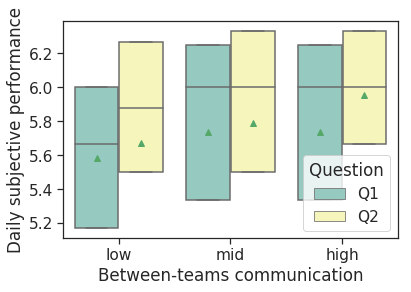

In [47]:
### Daily, subjective, minutes, mean
ax,results = analyze_two_questions(
    data=company_dyads_daily_full_clean.dropna(), question_col="mean",indvar_col='minutes_out_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high,wiskers=False)

ax.set(xlabel=xlabel, ylabel='Daily subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_daily_mean_minutes_other.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_daily\_mean','level of communication')

1    127
2    125
0    115
Name: minutes_out_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 115 , 125


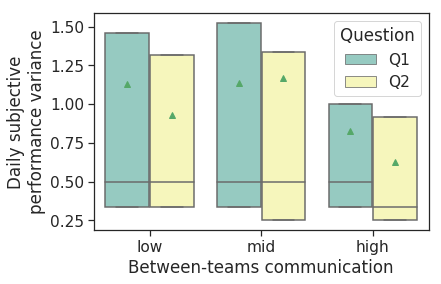

In [48]:
### Daily, subjective, minutes, var
ax,results = analyze_two_questions(
    data=company_dyads_daily_full_clean.dropna(), question_col="var",indvar_col='minutes_out_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high,wiskers=False)

ax.set(xlabel=xlabel, ylabel='Daily subjective\nperformance variance')
ax.legend(loc='upper right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_daily_var_minutes_other.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_daily\_var','level of communication')

2    6
0    6
1    5
Name: minutes_out_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 6


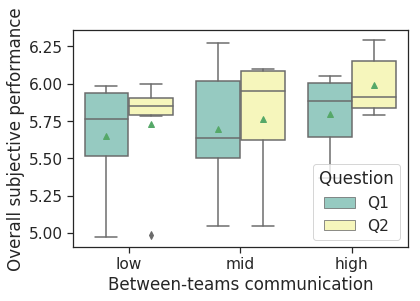

In [49]:
## Overall, subjective, minutes, mean
ax,results = analyze_two_questions(
    data=company_dyads_annual_full_clean, question_col="mean",indvar_col='minutes_out_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high)
    
ax.set(xlabel=xlabel, ylabel='Overall subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_overall_mean_minutes_other.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_overall\_mean','level of communication')

In [50]:
save_results(result_to_latex_tables(section_results),"between_comm.txt")

\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &       q1 daily mean &            0.08* &              low &             high &           5.58 (0.07) &           5.73 (0.07) &     0.15 &               0.00*** &               0.00*** \\
 2 &       q2 daily mean &          0.01*** &              low &             high &           5.67 (0.08) &           5.95 (0.05) &     0.28 &               0.00*** &               0.00*** \\
 3 &        q1 daily var &          0.01*** &              low &             high &           1.13 (0.13) &           0.83 (0.10) &     0.30 &               0.00*** &               0.00

2    6
0    6
1    5
Name: minutes_out_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 5 , 12
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &      milestone rank &            0.09* &           medium &     low and high &          12.60 (2.06) &           8.75 (1.59) &     3.85 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] On

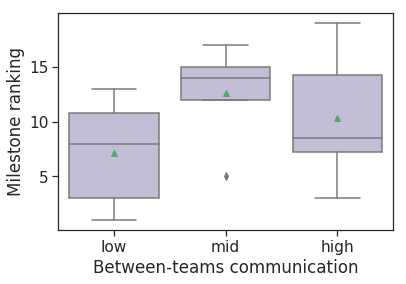

In [51]:
## Overall, objective, minutes
section_results=[]

ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_rank_r",indvar_col='minutes_out_62_norm_members_p',
    g1=[1],g2=[0,2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone ranking')
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rank_minutes_other.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rank','level of communication')

save_results(result_to_latex_tables(section_results),"between_comm_obj.txt")

### Objective, using $$$

2    6
0    6
1    5
Name: minutes_out_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 5 , 12
\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &   milestone rewards &            0.09* &           medium &     low and high &     16646.00 (471.34) &     15696.25 (482.79) &   949.75 &               0.00*** &               0.00*** \\
\bottomrule
\end{tabularx}
  \footnotesize
  \begin{tablenotes}
  \item[1] ${*}p < 0.1$, ${*}{*}p < 0.05$, ${*}{*}{*}p < 0.01$ 
  \item[2] Tercile(s) used in Mann-Whitney U test 
  \item[3] Standard errors in parentheses 
  \item[4] On

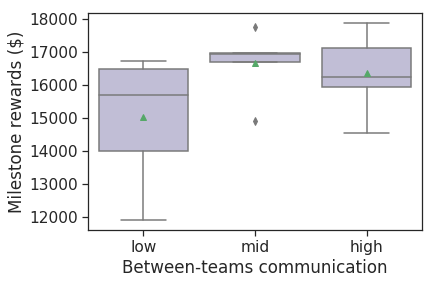

In [52]:
## Overall, objective, minutes
section_results=[]

ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_total",indvar_col='minutes_out_62_norm_members_p',
    g1=[1],g2=[0,2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone rewards (\$)')
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rewards_minutes_other.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rewards','level of communication')

save_results(result_to_latex_tables(section_results),"between_comm_obj_rewards.txt")


## EIRs

In [53]:
xlabel='Communication with mentors'
section_results=[]

2    129
1    128
0    110
Name: minutes_eir_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 110 , 129


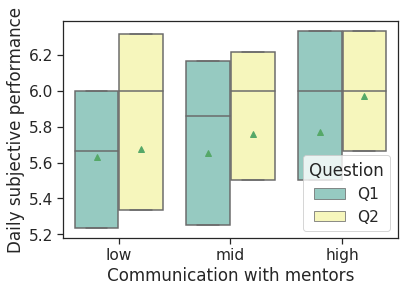

In [54]:
### Daily, subjective, minutes, mean
ax,results = analyze_two_questions(
    data=company_dyads_daily_full_clean.dropna(), question_col="mean",indvar_col='minutes_eir_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high,wiskers=False)

ax.set(xlabel=xlabel, ylabel='Daily subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_daily_mean_minutes_eir.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_daily\_mean','level of communication')

2    129
1    128
0    110
Name: minutes_eir_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 110 , 129


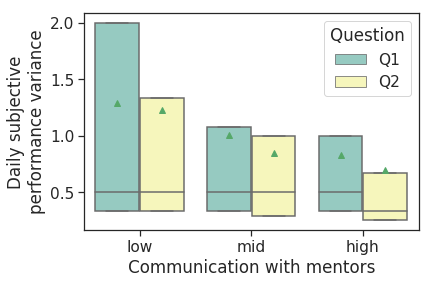

In [55]:
### Daily, subjective, minutes, var
ax,results = analyze_two_questions(
    data=company_dyads_daily_full_clean.dropna(), question_col="var",indvar_col='minutes_eir_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high,wiskers=False)
    
ax.set(xlabel=xlabel, ylabel='Daily subjective\nperformance variance')
ax.legend(loc='upper right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_daily_var_minutes_eir.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_daily\_var','level of communication')

2    6
0    6
1    5
Name: minutes_eir_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 6


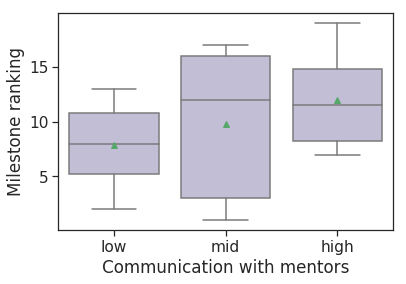

In [56]:
## Overall, objective, minutes
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_rank_r",indvar_col='minutes_eir_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone ranking')
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rank_minutes_eir.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rank','level of communication')

In [57]:
save_results(result_to_latex_tables(section_results),"eir_comm.txt")

\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &       q1 daily mean &           0.03** &              low &             high &           5.63 (0.07) &           5.77 (0.07) &     0.14 &               0.00*** &               0.00*** \\
 2 &       q2 daily mean &          0.00*** &              low &             high &           5.67 (0.08) &           5.97 (0.07) &     0.30 &               0.00*** &               0.00*** \\
 3 &        q1 daily var &           0.03** &              low &             high &           1.29 (0.15) &           0.83 (0.09) &     0.46 &               0.00*** &               0.00

### Objetive, using $$$

2    6
0    6
1    5
Name: minutes_eir_62_norm_members_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 6 , 6


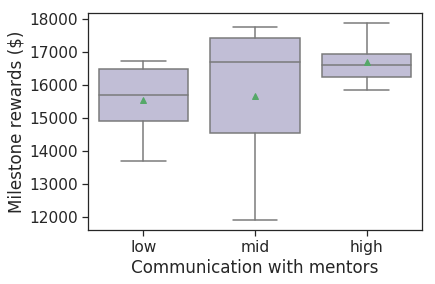

In [58]:
## Overall, objective, minutes
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_total",indvar_col='minutes_eir_62_norm_members_p',
    g1=[0],g2=[2],
    lables=levels_min_mid_high)

ax.set(xlabel=xlabel, ylabel='Milestone rewards (\$)')
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rewards_minutes_eir.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rewards','level of communication')

In [59]:
save_results(result_to_latex_tables(section_results),"eir_comm_rewards.txt")


\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} & Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &       q1 daily mean &           0.03** &              low &             high &           5.63 (0.07) &           5.77 (0.07) &     0.14 &               0.00*** &               0.00*** \\
 2 &       q2 daily mean &          0.00*** &              low &             high &           5.67 (0.08) &           5.97 (0.07) &     0.30 &               0.00*** &               0.00*** \\
 3 &        q1 daily var &           0.03** &              low &             high &           1.29 (0.15) &           0.83 (0.09) &     0.46 &               0.00*** &               0.00

## Company size

In [60]:
section_results=[]

1    7
0    7
2    3
Name: members_count_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 7 , 10


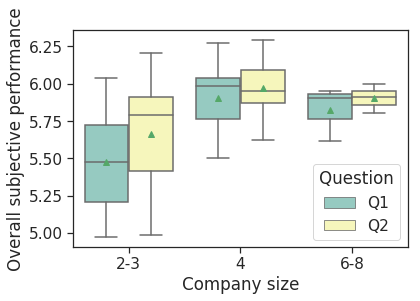

In [61]:
### overall, subjective, size
ax,results = analyze_two_questions(
    data=company_dyads_annual_full_clean, question_col="mean",indvar_col='members_count_p',
    g1=[0],g2=[1,2],
    lables=levels_size)
    
ax.set(xlabel='Company size', ylabel='Overall subjective performance')
ax.legend(loc='lower right', frameon=True, title="Question")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_q_overall_mean_teamsize.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'q{}\_overall\_mean','teams', levels=levels_size_words)

1    7
0    7
2    3
Name: members_count_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 7 , 3


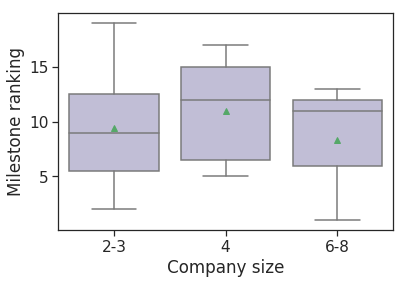

In [62]:
## overall, overall, size
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_rank_r",indvar_col='members_count_p',
    g1=[0],g2=[2],
    lables=levels_size)

ax.set(xlabel='Company size', ylabel='Milestone ranking')

#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rank_teamsize.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rank','teams', levels=levels_size_words)

In [63]:
save_results(result_to_latex_tables(section_results),"team_Size.txt")

\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} &  Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &     q1 overall mean &           0.01** &            small &  medium and large &           5.48 (0.15) &           5.88 (0.07) &     0.40 &               0.00*** &               0.00*** \\
 2 &     q2 overall mean &            0.07* &            small &  medium and large &           5.66 (0.18) &           5.95 (0.06) &     0.29 &               0.00*** &               0.00*** \\
 3 &      milestone rank &             0.50 &            small &             large &           9.43 (2.30) &           8.33 (3.71) &     1.10 &               0.00*** &               

### Objective, using $$$

1    7
0    7
2    3
Name: members_count_p, dtype: int64
Test: <function mannwhitneyu at 0x7fdfce168aa0>
Group sizes:  , 7 , 3


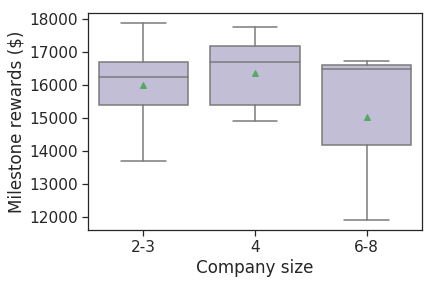

In [72]:
## overall, overall, size
ax,results = analyze_milestone(
    data=company_dyads_annual_full_clean, performance_col="m123_total",indvar_col='members_count_p',
    g1=[0],g2=[2],
    lables=levels_size)

ax.set(xlabel='Company size', ylabel='Milestone rewards (\$)')

#color=sns.color_palette("Set3")[2]
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_m_rewards_teamsize.png', bbox_inches='tight')
section_results = section_results + results_to_array(results,'milestone\_rewards','teams', levels=levels_size_words)

In [73]:
save_results(result_to_latex_tables(section_results),"team_Size_rewards.txt")


\begin{table}[h]
  \caption{Daily/Overall subjective/Objective performance and ???-team communication}
  \label{tab:deltav_????}
  \begin{center}
  \small
  \begin{threeparttable}
\begin{tabularx}{\textwidth}{SBMMMMMMMM}
\toprule
   & Performance measure & p-value\tnote{1} & Group A\tnote{2} &  Group B\tnote{2} & Group A mean\tnote{3} & Group B mean\tnote{3} & $\Delta$ & Group A KS\tnote{1,4} & Group B KS\tnote{1,4} \\
\midrule
 1 &     q1 overall mean &           0.01** &            small &  medium and large &           5.48 (0.15) &           5.88 (0.07) &     0.40 &               0.00*** &               0.00*** \\
 2 &     q2 overall mean &            0.07* &            small &  medium and large &           5.66 (0.18) &           5.95 (0.06) &     0.29 &               0.00*** &               0.00*** \\
 3 &      milestone rank &             0.50 &            small &             large &           9.43 (2.30) &           8.33 (3.71) &     1.10 &               0.00*** &               

# Correaltion matrices

## Shared functions

In [66]:
div_cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [67]:
import re

def rename_columns(df,q_prefix=""):
    cols = {}
    # create a dict
    for c in df.columns:
        cols[c] = c
        
    # rename
    for key, value in cols.iteritems():
        value = value.replace("Q1_mean", "q1_"+q_prefix+"_mean")
        value = value.replace("Q1_var", "q1_"+q_prefix+"_var")
        value = value.replace("Q2_mean", "q2_"+q_prefix+"_mean")
        value = value.replace("Q2_var", "q2_"+q_prefix+"_var")        
        value = value.replace("minutes_62_m2c_entropy_p","minutes_company_entropy")
        value = value.replace("minutes_62", "minutes_company_62")
        value = value.replace("_62", "")
        value = value.replace("minutes_out", "minutes_other")
        value = value.replace("minutes_eir", "minutes_mentors")
        value = value.replace("norm_members", "norm_size")
        value = value.replace("m123_rank_r", "milestone_rank")
        value = value.replace("members_count", "company_size")
        value = re.sub('_p$', '_t', value)
        cols[key] = value
    return cols
        
#rename_columns(company_dyads_daily_full_clean[all_columns],"daily")

In [68]:
def plot_corr_martix(df,q_prefix=""):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    f, ax = plt.subplots(figsize=(20, 10))
    df = df.rename(columns=rename_columns(df,q_prefix))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  cmap=div_cmap,
            square=False, ax=ax, annot=True, center=0.0,  fmt='.2f')
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=90)
    return ax

## Daily

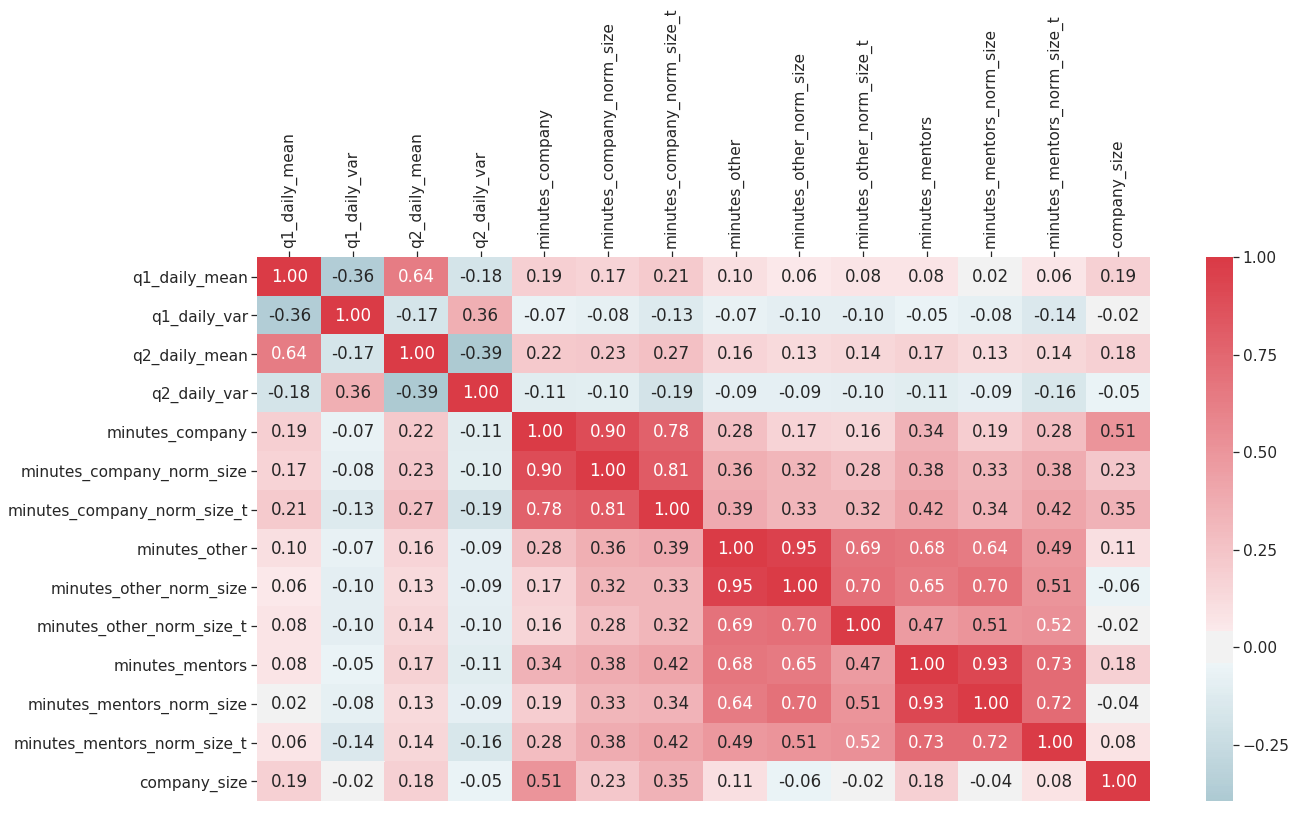

In [69]:
# Daily
minutes_columns =     ['minutes_62','minutes_62_norm_members','minutes_62_norm_members_p']
minutes_out_columns = ['minutes_out_62','minutes_out_62_norm_members','minutes_out_62_norm_members_p']
minutes_eir_columns = ['minutes_eir_62','minutes_eir_62_norm_members','minutes_eir_62_norm_members_p']
size_columns = ['members_count']
q1_columns = ['Q1_mean','Q1_var']
q2_columns = ['Q2_mean','Q2_var']
all_columns = q1_columns + q2_columns + minutes_columns + minutes_out_columns + minutes_eir_columns + size_columns 

ax = plot_corr_martix(company_dyads_daily_full_clean[all_columns],q_prefix="daily")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_corr_daily.png', bbox_inches='tight')

## Overall

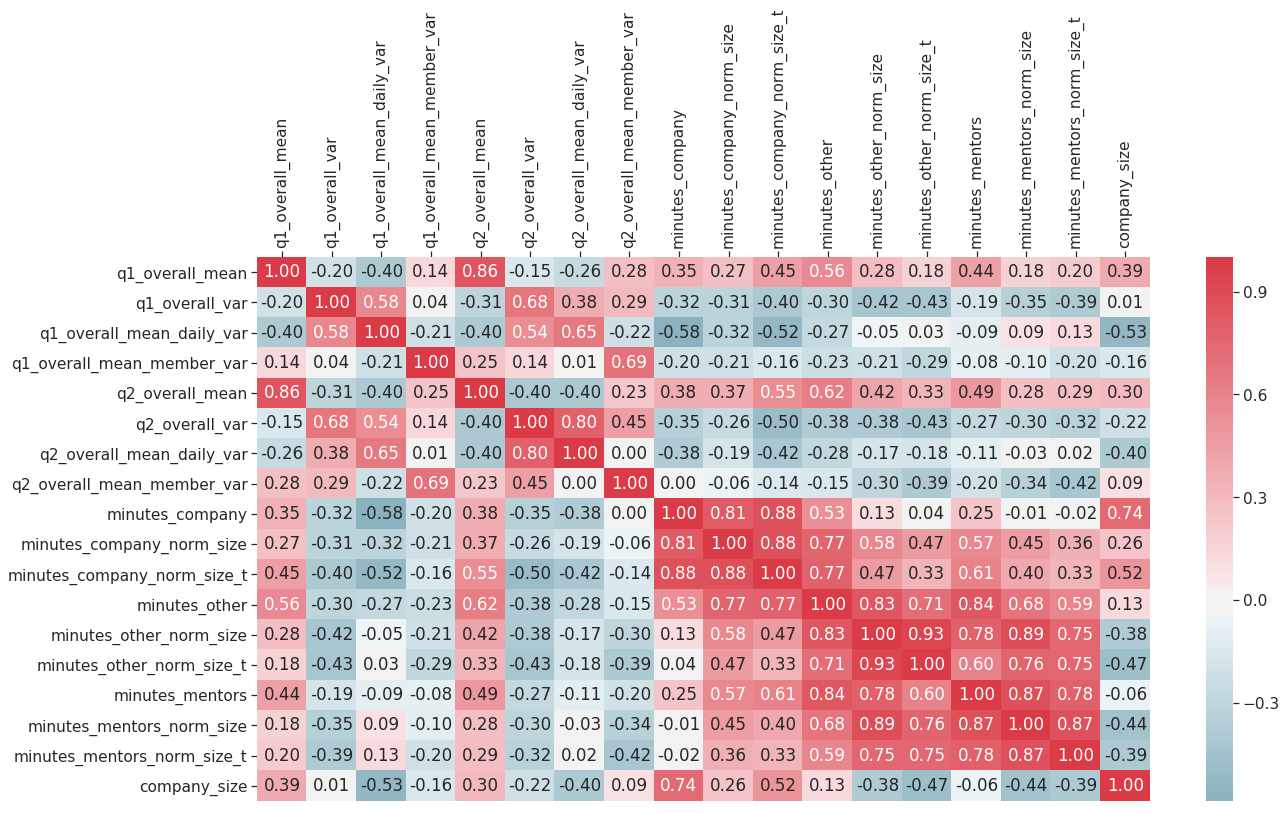

In [70]:
# Daily
minutes_columns =     ['minutes_62','minutes_62_norm_members','minutes_62_norm_members_p']
minutes_out_columns = ['minutes_out_62','minutes_out_62_norm_members','minutes_out_62_norm_members_p']
minutes_eir_columns = ['minutes_eir_62','minutes_eir_62_norm_members','minutes_eir_62_norm_members_p']
size_columns = ['members_count']
q1_columns = ['Q1_mean','Q1_var','Q1_mean_daily_var','Q1_mean_member_var']
q2_columns = ['Q2_mean','Q2_var','Q2_mean_daily_var','Q2_mean_member_var']

all_columns = q1_columns + q2_columns + minutes_columns + minutes_out_columns + minutes_eir_columns + size_columns 

ax = plot_corr_martix(company_dyads_annual_full_clean[all_columns],q_prefix="overall")
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_corr_overall.png', bbox_inches='tight')

## Milestone

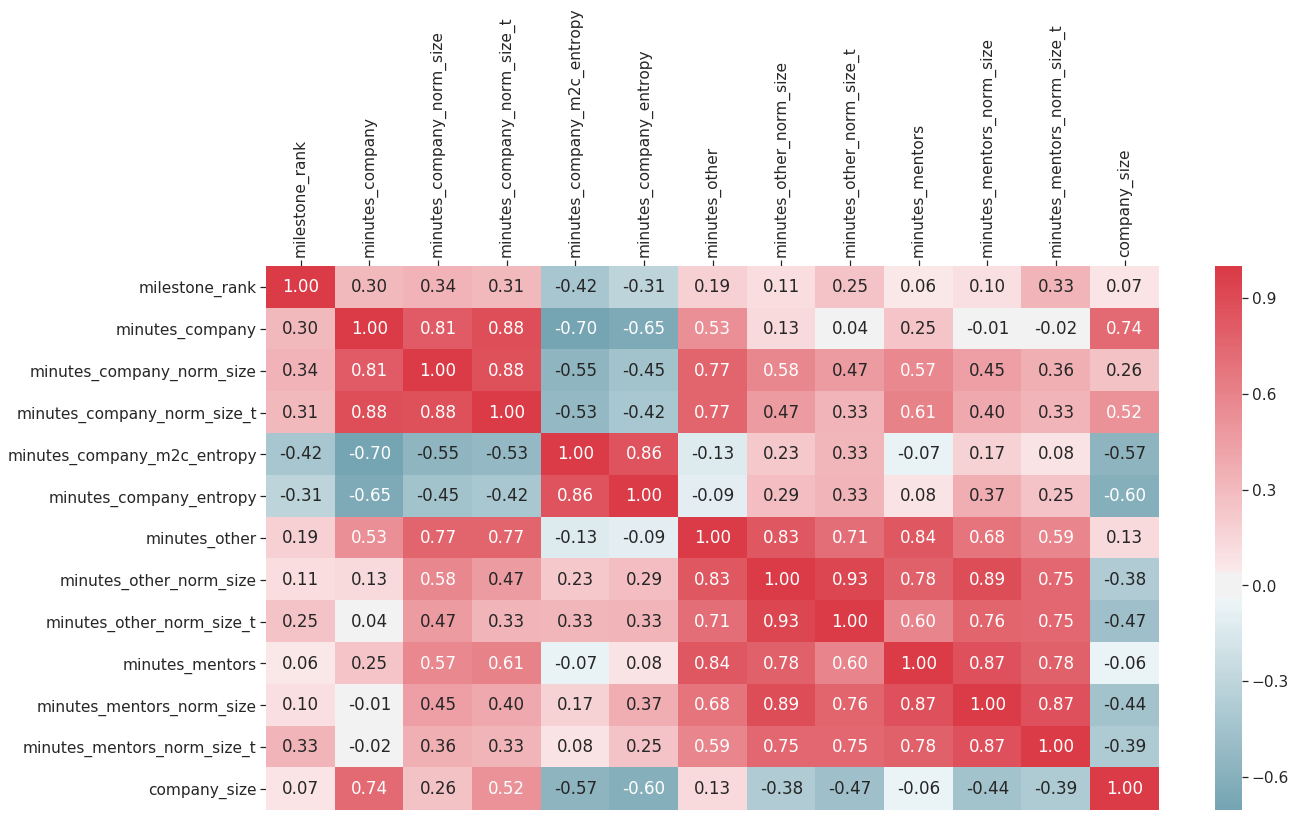

In [71]:
# Daily
minutes_columns =     ['minutes_62','minutes_62_norm_members','minutes_62_norm_members_p','minutes_62_m2c_entropy','minutes_62_m2c_entropy_p']
minutes_out_columns = ['minutes_out_62','minutes_out_62_norm_members','minutes_out_62_norm_members_p']
minutes_eir_columns = ['minutes_eir_62','minutes_eir_62_norm_members','minutes_eir_62_norm_members_p']
size_columns = ['members_count']
milestone_columns = ['m123_rank_r']

all_columns = milestone_columns + minutes_columns + minutes_out_columns + minutes_eir_columns + size_columns 

ax = plot_corr_martix(company_dyads_annual_full_clean[all_columns])
fig = ax.get_figure()
fig.savefig('/home/orenled/temp/deltav_corr_milestone.png', bbox_inches='tight')